# Import packages

In [60]:
import numpy as np
import pandas as pd
import plotly.express as px
from IPython.display import IFrame
from sklearn.decomposition import PCA

# Define variables and helper functions

In [2]:
t_N = 5.
# delta_t = 1
# delta_x = 1
steps = 5
Rdot_a = 2.
Rdot_b = 1.

In [3]:
def get_impingement_interface_pos(x_a, x_b, t_a, t_b, rdot_a=Rdot_a, rdot_b=Rdot_b):
    if x_a <= x_b:
        return rdot_a*rdot_b/(rdot_a+rdot_b)*(x_a/rdot_a+x_b/rdot_b+t_b-t_a)
    else:
        return rdot_a*rdot_b/(rdot_a+rdot_b)*(x_a/rdot_a+x_b/rdot_b+t_a-t_b)

# Generic for-loop implementation

In [4]:
records = []

# set the growth rate ratio
for Rdot_a in np.linspace(1.5, 6, num=9):
    # get the induction time of the beta phase
    for t_b in np.linspace(0, t_N, num=steps):
        # get the induction time of the alpha phase
        for t_a in np.linspace(0, t_N, num=steps):
            # get the induction position of the beta phase
            for x_b in np.linspace(-Rdot_b*(t_N-t_a), Rdot_b*(t_N-t_a), num=steps):
                # get the induction position of the alpha phase
                for x_a in np.linspace(-Rdot_a*(t_N-t_a), x_b-Rdot_b*abs(t_a-t_b), num=steps):
                    # get the position of the impingement interface
                    interface_pos = get_impingement_interface_pos(x_a, x_b, t_a, t_b, rdot_a=Rdot_a)
                    if interface_pos < 0:
                        phase = "beta"
                    else:
                        phase = "alpha"
                    records.append({"t_b": t_b, "t_a": t_a, "x_b": x_b, "x_a": x_a, "Rdot_ratio": Rdot_a, "phase": phase})

In [5]:
df = pd.DataFrame.from_records(records)
df

,t_b,t_a,x_b,x_a,Rdot_ratio,phase
0,0.0,0.0,-5.0,-7.500,1.5,beta
1,0.0,0.0,-5.0,-6.875,1.5,beta
2,0.0,0.0,-5.0,-6.250,1.5,beta
3,0.0,0.0,-5.0,-5.625,1.5,beta
4,0.0,0.0,-5.0,-5.000,1.5,beta
...,...,...,...,...,...,...
5620,5.0,5.0,0.0,0.000,6.0,alpha
5621,5.0,5.0,0.0,0.000,6.0,alpha
5622,5.0,5.0,0.0,0.000,6.0,alpha
5623,5.0,5.0,0.0,0.000,6.0,alpha


In [6]:
df["delta_t"] = df["t_a"] - df["t_b"]

In [7]:
df["delta_x"] = df["x_a"] - df["x_b"]

In [8]:
df

,t_b,t_a,x_b,x_a,Rdot_ratio,phase,delta_t,delta_x
0,0.0,0.0,-5.0,-7.500,1.5,beta,0.0,-2.500
1,0.0,0.0,-5.0,-6.875,1.5,beta,0.0,-1.875
2,0.0,0.0,-5.0,-6.250,1.5,beta,0.0,-1.250
3,0.0,0.0,-5.0,-5.625,1.5,beta,0.0,-0.625
4,0.0,0.0,-5.0,-5.000,1.5,beta,0.0,0.000
...,...,...,...,...,...,...,...,...
5620,5.0,5.0,0.0,0.000,6.0,alpha,0.0,0.000
5621,5.0,5.0,0.0,0.000,6.0,alpha,0.0,0.000
5622,5.0,5.0,0.0,0.000,6.0,alpha,0.0,0.000
5623,5.0,5.0,0.0,0.000,6.0,alpha,0.0,0.000


In [68]:
phase_diagram_3d = px.scatter_3d(df, x="delta_x", y="delta_t", z="Rdot_ratio", color="phase", width=1000, height=800)
phase_diagram_3d.write_html("./phase_diagram_3d.html")
IFrame(src="./phase_diagram_3d.html", width=1100, height=820)

In [62]:
# px.scatter(df, x="delta_t", y="delta_x", color="phase",
#            width=1000, height=800)

# Dimensionality reduction

In [45]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=3)

In [47]:
tranformed_data = pca.fit_transform(StandardScaler().fit_transform(df.drop(columns=["phase", "delta_x", "delta_t"])))

In [48]:
tranformed_data

array([[ 1.00904978, -2.35074551,  1.41421356],
       [ 0.93245992, -2.35074551,  1.41421356],
       [ 0.85587007, -2.35074551,  1.41421356],
       ...,
       [-1.03422733,  0.15293712, -1.41421356],
       [-1.03422733,  0.15293712, -1.41421356],
       [-1.03422733,  0.15293712, -1.41421356]])

In [57]:
pca_df = pd.DataFrame(tranformed_data, columns=["x%d" % i for i in range(1, tranformed_data.shape[1]+1)])
pca_df["phase"] = df.phase
pca_df

,x1,x2,x3,phase
0,1.009050,-2.350746,1.414214,beta
1,0.932460,-2.350746,1.414214,beta
2,0.855870,-2.350746,1.414214,beta
3,0.779280,-2.350746,1.414214,beta
4,0.702690,-2.350746,1.414214,beta
...,...,...,...,...
5620,-1.034227,0.152937,-1.414214,alpha
5621,-1.034227,0.152937,-1.414214,alpha
5622,-1.034227,0.152937,-1.414214,alpha
5623,-1.034227,0.152937,-1.414214,alpha


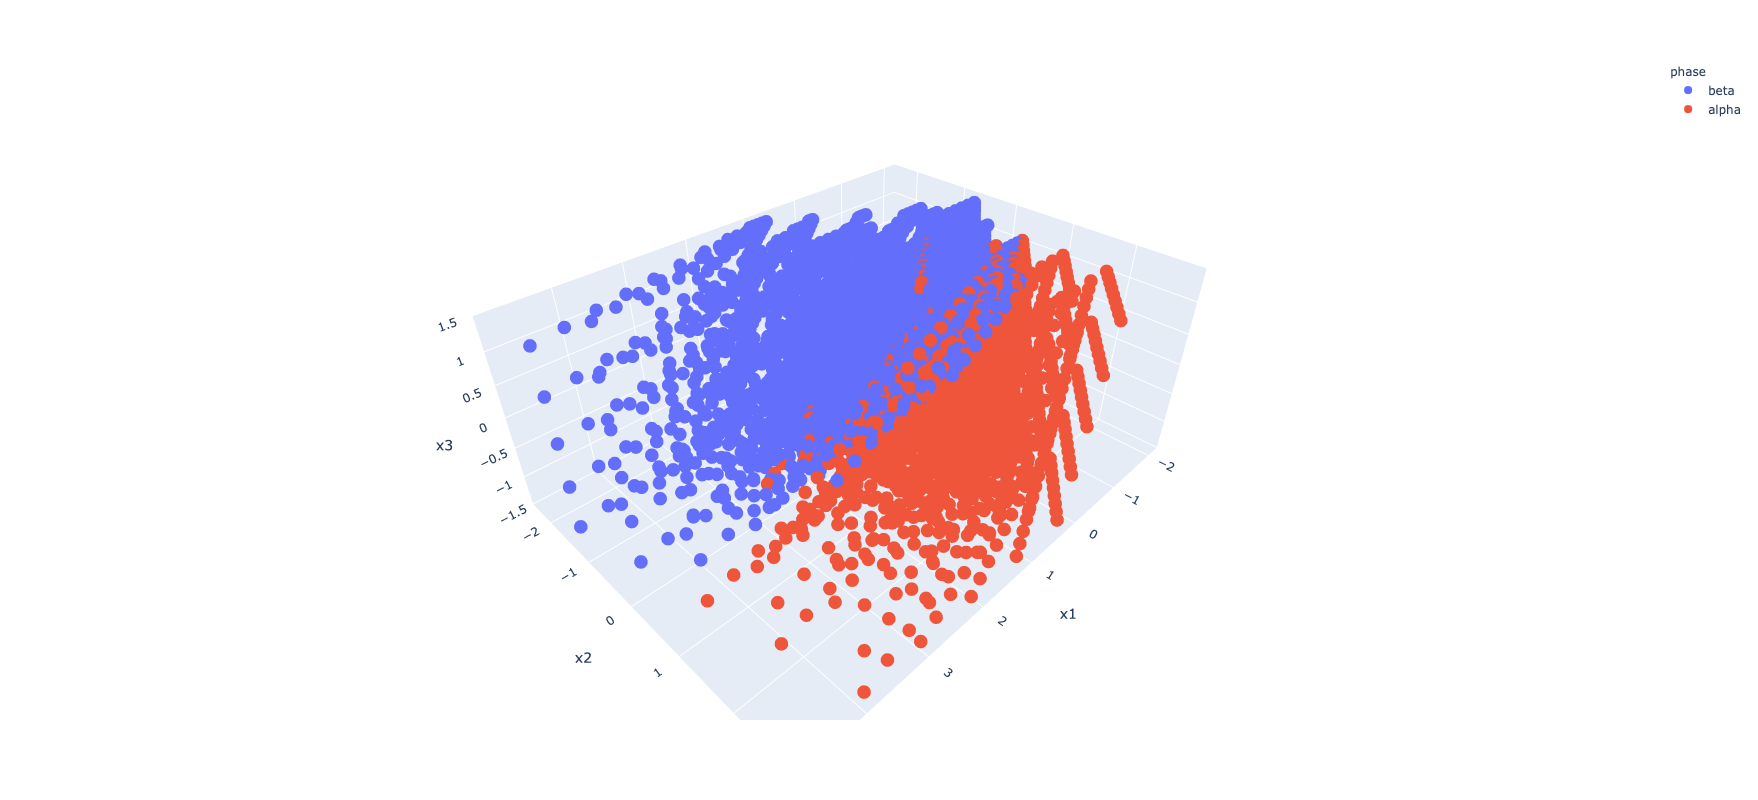

In [50]:
px.scatter_3d(pca_df, x="x1", y="x2", z="x3", color="phase", width=1000, height=800)

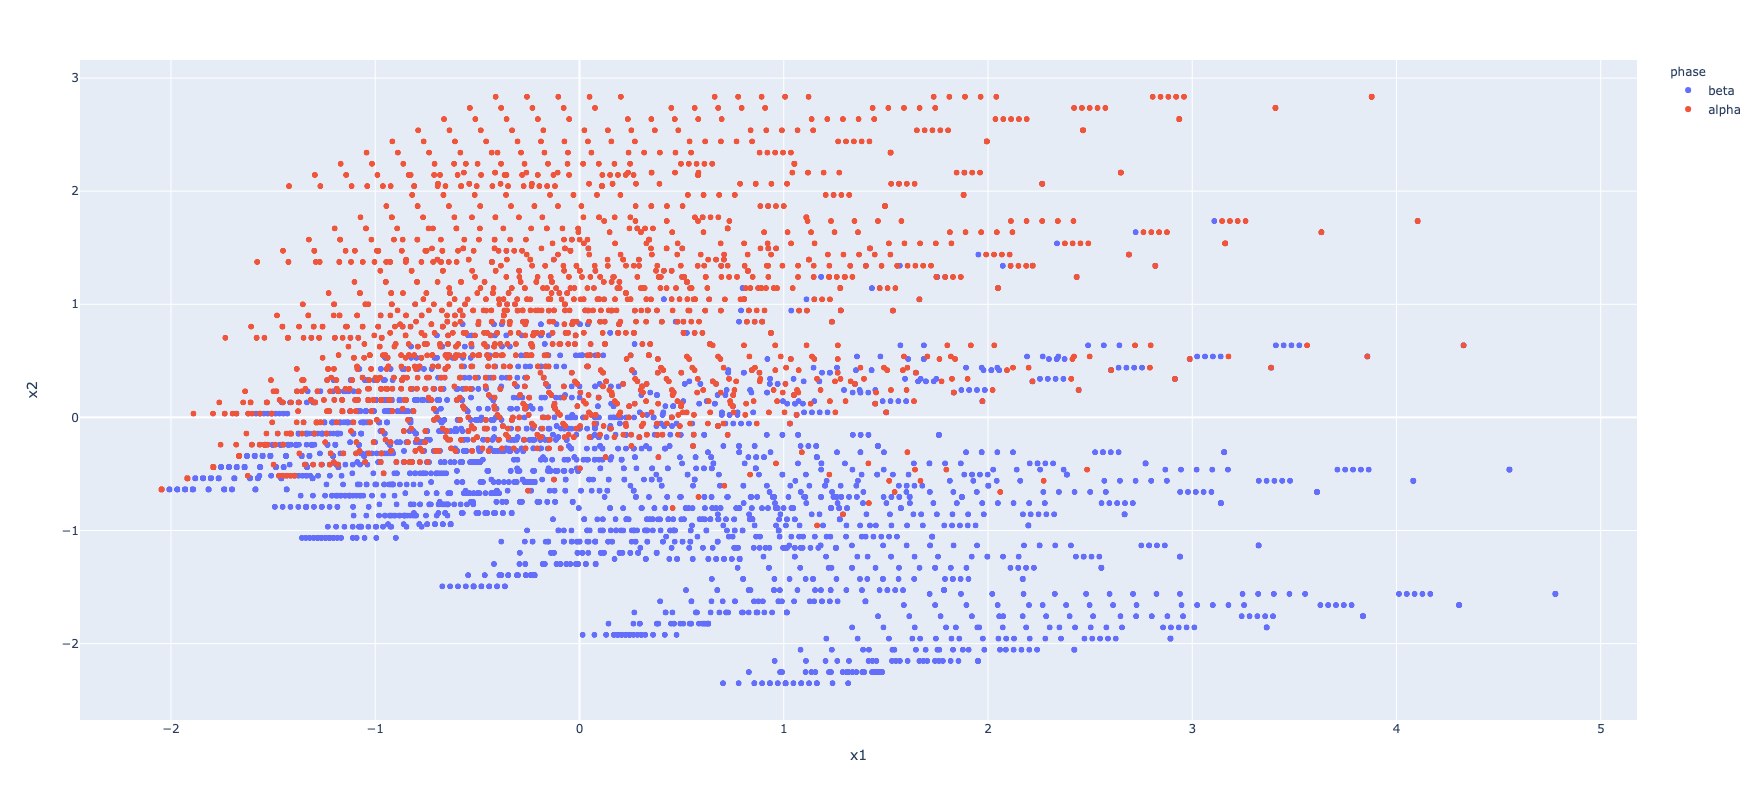

In [53]:
px.scatter(pca_df, x="x1", y="x2", color="phase", width=1000, height=800)